In [105]:
# Import all the libraries 
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# For scaler
from sklearn.preprocessing import StandardScaler

# For PCA 
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

# For visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# For k means clustering 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [106]:
# Import the dataframe 
df = pd.read_csv('Country-data.csv')

In [107]:
# Read the data
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [108]:
# Let's check the data
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [109]:
# Let's preserve the country column to some variable, so that we can make use of it later after perfroming PCA
y = df.pop("country")

In [110]:
# Check the data after removing 'country'
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [111]:
# Let's make one dataframe with 'country' column to perform PCA later and check the data
df_1  = pd.concat([y,df],axis=1)
df_1

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.00,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.40,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.50,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.90,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.80,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.80,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.30,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.30,5.88,20.7,16000,13.800,69.1,1.92,5840


### Checking the data for null values 

In [112]:
# Number of nulls per column
df.isnull().sum()

child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

 no null values are there

### Scaling the data

In [113]:
## Let's scale the data with standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = df.copy()
x = scaler.fit_transform(X)

In [114]:
# Check maximum value here
x.max()

9.129718055281284

### Applying PCA on the data

In [115]:
# Importing the PCA module
from sklearn.decomposition import PCA
pca = PCA(random_state=42)
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='auto', tol=0.0, whiten=False)

In [116]:
# Let's check the pca components
pca.components_

array([[-0.41951945,  0.28389698,  0.15083782,  0.16148244,  0.39844111,
        -0.19317293,  0.42583938, -0.40372896,  0.39264482],
       [ 0.19288394,  0.61316349, -0.24308678,  0.67182064,  0.02253553,
        -0.00840447, -0.22270674,  0.15523311, -0.0460224 ],
       [-0.02954353,  0.14476069, -0.59663237, -0.29992674,  0.3015475 ,
         0.64251951,  0.11391854,  0.01954925,  0.12297749],
       [ 0.37065326,  0.00309102,  0.4618975 , -0.07190746,  0.39215904,
         0.15044176, -0.20379723,  0.37830365,  0.53199457],
       [-0.16896968,  0.05761584,  0.51800037,  0.25537642, -0.2471496 ,
         0.7148691 ,  0.1082198 , -0.13526221, -0.18016662],
       [ 0.20062815, -0.05933283,  0.00727646, -0.03003154,  0.16034699,
         0.06628537, -0.60112652, -0.75068875,  0.01677876],
       [-0.07948854, -0.70730269, -0.24983051,  0.59218953,  0.09556237,
         0.10463252,  0.01848639,  0.02882643,  0.24299776],
       [-0.68274306, -0.01419742,  0.07249683, -0.02894642,  0

In [117]:
# Let's check the Ratio explained by variance 
pca.explained_variance_ratio_

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235, 0.0126043 , 0.00981282, 0.00743056])

In [118]:
# Importing visualisation libary
import matplotlib.pyplot as plt

<BarContainer object of 9 artists>

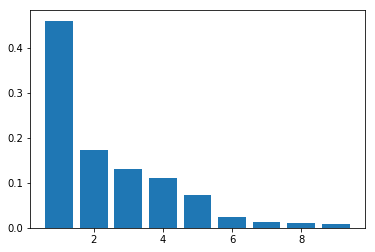

In [119]:
# Let's make bar plot of explained_variance_ratio_
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)

In [120]:
# Let's make it cumulative 
var_cumu = np.cumsum(pca.explained_variance_ratio_)
var_cumu

array([0.4595174 , 0.63133365, 0.76137624, 0.87190786, 0.94530998,
       0.97015232, 0.98275663, 0.99256944, 1.        ])

### Making Scree plot 

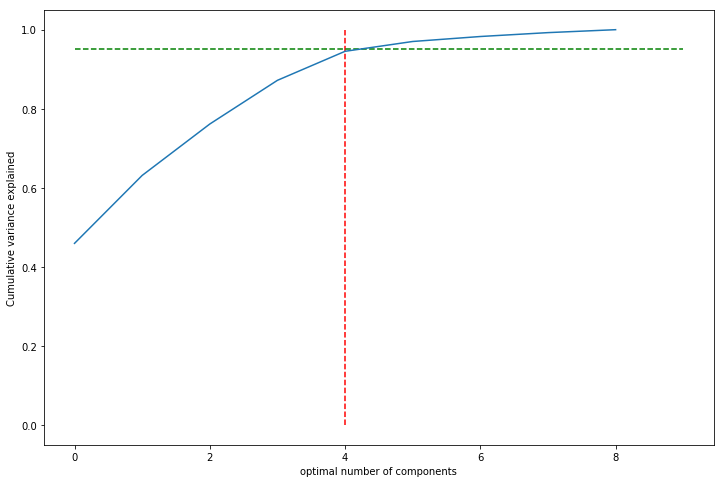

In [121]:
# Let's visualise through scree plot
fig = plt.figure(figsize=[12,8])
plt.vlines(x=4, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=9, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)

plt.ylabel("Cumulative variance explained")
plt.xlabel("optimal number of components")
plt.show()

From Scree plot 4 seems the optimal number of Components 

### PCA with 4 components

In [122]:
# Import the PCA libary 
from sklearn.decomposition import IncrementalPCA
# Perform the PCA
pca_final = IncrementalPCA(n_components=4)

# Fit and Transform PCA
df_pca = pca_final.fit_transform(x)
# Check the Shape of PCA module 
df_pca.shape

(167, 4)

In [123]:
#First convert the numpy array that we have to a dataframe
df1 = pd.DataFrame(df_pca, columns=["PC1", "PC2","PC3","PC4"])
df1.head()

,PC1,PC2,PC3,PC4
0,-2.913787,0.088354,0.721003,0.996699
1,0.429358,-0.587859,0.321052,-1.171193
2,-0.282988,-0.446657,-1.225135,-0.850127
3,-2.930969,1.699437,-1.521734,0.875966
4,1.031988,0.130488,0.192922,-0.844808


In [124]:
# Checking shape of data
df1.shape

(167, 4)

### Adding 'Country' with this PCA performed data

In [125]:
# Let's Concantinating the two dataframe
df2 = pd.concat([y,df1],axis = 1)


In [126]:
# Checking the data after concatinating
df2.head()

,country,PC1,PC2,PC3,PC4
0,Afghanistan,-2.913787,0.088354,0.721003,0.996699
1,Albania,0.429358,-0.587859,0.321052,-1.171193
2,Algeria,-0.282988,-0.446657,-1.225135,-0.850127
3,Angola,-2.930969,1.699437,-1.521734,0.875966
4,Antigua and Barbuda,1.031988,0.130488,0.192922,-0.844808


In [127]:
# Checking the info again
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 5 columns):
country    167 non-null object
PC1        167 non-null float64
PC2        167 non-null float64
PC3        167 non-null float64
PC4        167 non-null float64
dtypes: float64(4), object(1)
memory usage: 6.6+ KB


### Let's perfrom Outlier treatmentv

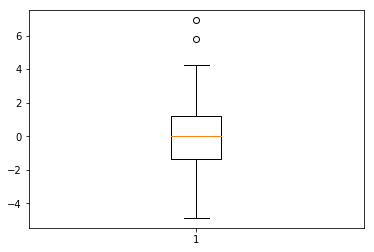

In [128]:
# Outlier treatment through visualisation For PC1
plt.boxplot(df2.PC1)
Q1=df2.PC1.quantile(0.05)
Q3 =df2.PC1.quantile(0.95)
IQR = Q3-Q1
df2 = df2[(df2.PC1 >=Q1) & (df2.PC1<=Q3)]

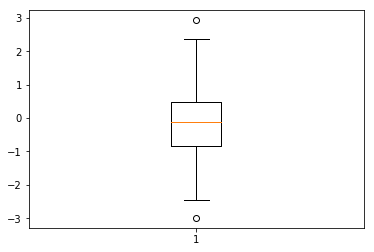

In [129]:
# Outlier treatment through visualisation For PC2
plt.boxplot(df2.PC2)
Q1=df2.PC2.quantile(0.05)
Q3 =df2.PC2.quantile(0.95)
IQR = Q3-Q1
df2 = df2[(df2.PC2 >=Q1) & (df2.PC2<=Q3)]

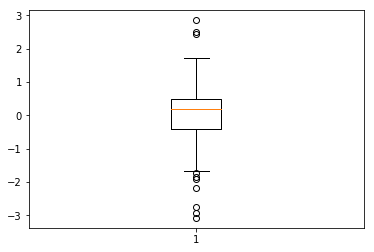

In [130]:
# Outlier treatment through visualisation For PC3
plt.boxplot(df2.PC3)
Q1=df2.PC3.quantile(0.05)
Q3 =df2.PC3.quantile(0.95)
IQR = Q3-Q1
df2 = df2[(df2.PC3>=Q1) & (df2.PC3<=Q3)]

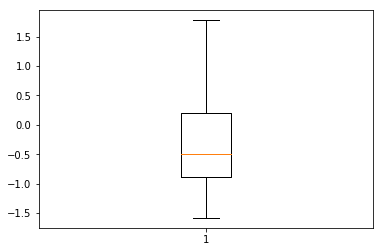

In [131]:
# Outlier treatment through visualisation For PC4
plt.boxplot(df2.PC4)
Q1=df2.PC4.quantile(0.05)
Q3 =df2.PC4.quantile(0.95)
IQR = Q3-Q1
df2 = df2[(df2.PC4>=Q1) & (df2.PC4<=Q3)]

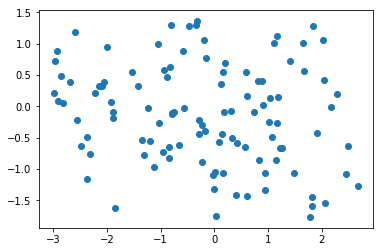

In [132]:
#Let's visualise the resultant PCs
plt.scatter(x='PC1',y='PC2',data=df2)

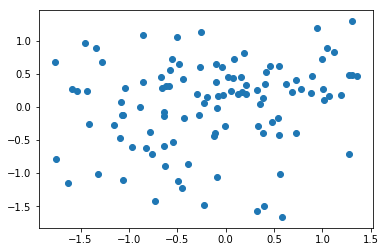

In [133]:
#Let's visualise the resultant PCs
plt.scatter(x='PC2',y='PC3',data=df2)

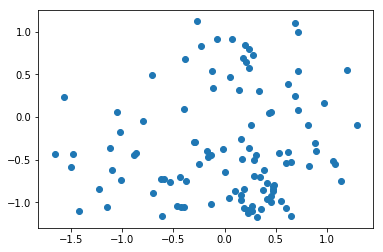

In [134]:
#Let's visualise the resultant PCs
plt.scatter(x='PC3',y='PC4',data=df2)

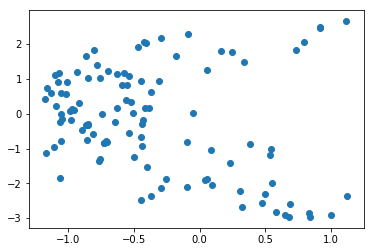

In [135]:
#Let's visualise the resultant PCs
plt.scatter(x='PC4',y='PC1',data=df2)

## Hopkins Statistics:
The Hopkins statistic, is a statistic which gives a value which indicates the cluster tendency, in other words: how well the data can be clustered.

- If the value is between {0.01, ...,0.3}, the data is regularly spaced.

- If the value is around 0.5, it is random.

- If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

In [136]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [137]:
#Use the Hopkins Statistic function by passing the above dataframe as a paramter
hopkins(df2.drop('country',axis=1))

0.6784049442729141

It is a good Hopkins score to cluster

In [138]:
# Now for perfroming clustering, we need to again drop the ID column, Let's drop it
df3 =df2.drop('country',axis = 1)

In [139]:
# Check the data after dropping column country
df3.head()

,PC1,PC2,PC3,PC4
0,-2.913787,0.088354,0.721003,0.996699
1,0.429358,-0.587859,0.321052,-1.171193
2,-0.282988,-0.446657,-1.225135,-0.850127
4,1.031988,0.130488,0.192922,-0.844808
5,0.028470,-1.756721,-0.793520,-0.052486


## K Means clustering 

#  Modelling

In [140]:
# silhouette analysis 
range_n_clusters = [2,3,4,5,6,7,8]
for num_clusters in range_n_clusters:
    
    # initialise kmeans 
    kmeans = KMeans(n_clusters=num_clusters,max_iter=50)
    kmeans.fit(df3)
    
    cluster_labels = kmeans.labels_
    
    # silhouette_score
    silhouette_avg = silhouette_score(df3,cluster_labels)
    print("For n_clusetrs={0}, the silhouette score is {1}".format(num_clusters,silhouette_avg))

For n_clusetrs=2, the silhouette score is 0.36471883585239134
For n_clusetrs=3, the silhouette score is 0.3007890298178844
For n_clusetrs=4, the silhouette score is 0.30006082508097665
For n_clusetrs=5, the silhouette score is 0.3058068726618287
For n_clusetrs=6, the silhouette score is 0.31479493746199555
For n_clusetrs=7, the silhouette score is 0.29535455565387847
For n_clusetrs=8, the silhouette score is 0.2592678404293082


from silhouette analysis nothing can be said clearly 

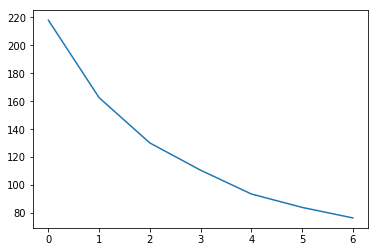

In [141]:
# Elbow-curve/SSD
ssd = []
range_n_clusters = [2,3,4,5,6,7,8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters,max_iter=50)
    kmeans.fit(df3)
    
    ssd.append(kmeans.inertia_)
    
# Plot the SSDs for n_clusters 
plt.plot(ssd)

From Elbow-curve/SSD it looks like 3 is optimal number of clusetrs for this dataset

In [142]:
# final model with k=3
kmeans = KMeans(n_clusters = 3,max_iter=50,random_state =50)
kmeans.fit(df3)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=50, tol=0.0001, verbose=0)

In [143]:
kmeans.labels_

array([2, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 2, 0, 0, 2, 1, 0, 2, 1, 2, 1,
       2, 1, 1, 1, 0, 0, 0, 0, 2, 1, 0, 1, 2, 2, 1, 1, 2, 1, 0, 0, 2, 0,
       1, 1, 0, 0, 0, 2, 1, 0, 0, 2, 0, 2, 1, 1, 0, 1, 1, 2, 2, 1, 1, 0,
       1, 0, 2, 0, 2, 0, 1, 2, 1, 0, 0, 0, 1, 1, 0, 0, 0, 2, 1, 1, 1, 2,
       2, 1, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2])

In [144]:
# Let's add the cluster Ids to the PCs data 
dat_km = pd.concat([df2.reset_index().drop('index',axis=1),pd.Series(kmeans.labels_)],axis=1)
dat_km.columns= ['country','PC1','PC2','PC3','PC4','ClusterID']
dat_km.head()

,country,PC1,PC2,PC3,PC4,ClusterID
0,Afghanistan,-2.913787,0.088354,0.721003,0.996699,2
1,Albania,0.429358,-0.587859,0.321052,-1.171193,0
2,Algeria,-0.282988,-0.446657,-1.225135,-0.850127,0
3,Antigua and Barbuda,1.031988,0.130488,0.192922,-0.844808,1
4,Argentina,0.028470,-1.756721,-0.793520,-0.052486,0


In [145]:
# Let's check the shape of data 
dat_km.shape

(107, 6)

In [146]:
# Check the count of observation per cluster
dat_km['ClusterID'].value_counts()

0    44
1    35
2    28
Name: ClusterID, dtype: int64

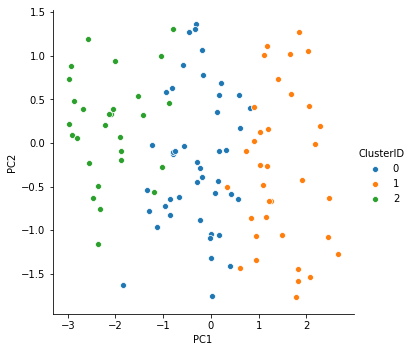

In [147]:
# Visualising the data of 'PC1' and 'PC2' based on 'CLusterID' 
sns.pairplot(data=dat_km, x_vars=["PC1"], y_vars=["PC2"], hue = "ClusterID", size=5)

Data is well clustered between PC1 and PC2

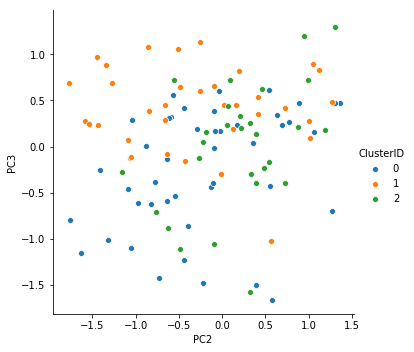

In [148]:
# Visualising the data of 'PC2' and 'PC3' based on 'CLusterID' 
sns.pairplot(data=dat_km, x_vars=["PC2"], y_vars=["PC3"], hue = "ClusterID", size=5)

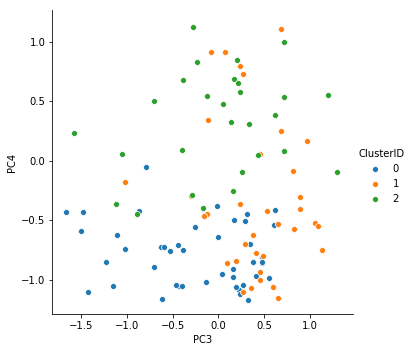

In [149]:
# Visualising the data of 'PC3' and 'PC4' based on 'CLusterID' 
sns.pairplot(data=dat_km, x_vars=["PC3"], y_vars=["PC4"], hue = "ClusterID", size=5)

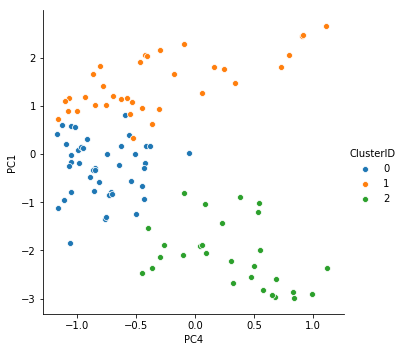

In [150]:
# Visualising the data of 'PC4' and 'PC1' based on 'CLusterID' 
sns.pairplot(data=dat_km, x_vars=["PC4"], y_vars=["PC1"], hue = "ClusterID", size=5)

Between PC4 and PC1 data is also well clustered 

## Cluster Profiling for Kmeans clustering 

In [151]:
# Let's merge the original data with the data(ClusterID)
df5 = pd.merge(df_1,dat_km,how = 'inner',on='country')
df5.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,ClusterID
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,-2.913787,0.088354,0.721003,0.996699,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0.429358,-0.587859,0.321052,-1.171193,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,-0.282988,-0.446657,-1.225135,-0.850127,0
3,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1.031988,0.130488,0.192922,-0.844808,1
4,Argentina,14.5,18.9,8.10,16.0,18700,20.90,75.8,2.37,10300,0.028470,-1.756721,-0.793520,-0.052486,0


In [152]:
# Let's drop PCs from the data
df5.drop(['PC1','PC2','PC3','PC4'],axis = 1,inplace =True)

In [153]:
# Let's check the data
df5.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1
4,Argentina,14.5,18.9,8.10,16.0,18700,20.90,75.8,2.37,10300,0


#### So we have performed the clustering using the PCs and have now allocated the clusterIDs back to each of the datapoints

## Analysis of the clusters

In [154]:
# Let's check the data of 'Child_mort' based on ClusterID
df5.groupby(['ClusterID']).child_mort.mean()

ClusterID
0    29.136364
1     7.928571
2    75.467857
Name: child_mort, dtype: float64

In [155]:
# Let's profile the cluster by taking the mean of various attributes
child_mort = pd.DataFrame(df5.groupby(['ClusterID']).child_mort.mean())
exports = pd.DataFrame(df5.groupby(['ClusterID']).exports.mean())
health = pd.DataFrame(df5.groupby(['ClusterID']).health.mean())
imports = pd.DataFrame(df5.groupby(['ClusterID']).imports.mean())
income = pd.DataFrame(df5.groupby(['ClusterID']).income.mean())
inflation = pd.DataFrame(df5.groupby(['ClusterID']).inflation.mean())
life_expec = pd.DataFrame(df5.groupby(['ClusterID']).life_expec.mean())
total_fer = pd.DataFrame(df5.groupby(['ClusterID']).total_fer.mean())
gdpp = pd.DataFrame(df5.groupby(['ClusterID']).gdpp.mean())

In [156]:
# Let's add column name to it
df8 = pd.concat([pd.Series([0,1,2]),child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp], axis=1)

In [157]:
df8.head()

,0,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,29.136364,36.165659,5.455455,42.271952,9612.727273,9.021500,71.218182,2.604545,4297.318182
1,1,7.928571,47.311429,8.142857,50.485714,23198.000000,2.331086,77.334286,1.753429,18304.857143
2,2,75.467857,28.553214,5.800714,39.150000,4060.642857,9.844107,60.925000,4.698929,1980.357143


In [158]:
# Let's add clusterID column name to it
df8.columns = ["ClusterID","child_mort","exports","health","imports","income","inflation","life_expec","total_fer","gdpp"]
df8

,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,29.136364,36.165659,5.455455,42.271952,9612.727273,9.021500,71.218182,2.604545,4297.318182
1,1,7.928571,47.311429,8.142857,50.485714,23198.000000,2.331086,77.334286,1.753429,18304.857143
2,2,75.467857,28.553214,5.800714,39.150000,4060.642857,9.844107,60.925000,4.698929,1980.357143


In [159]:
df5[df5['ClusterID']==2]['country']

0          Afghanistan
12               Benin
15            Botswana
18            Cameroon
20             Comoros
22       Cote d'Ivoire
30             Eritrea
34               Gabon
35              Gambia
38               Ghana
42              Guinea
49                Iraq
53               Kenya
55                 Lao
61          Madagascar
62              Malawi
68          Mozambique
70             Namibia
73            Pakistan
83             Senegal
87     Solomon Islands
88        South Africa
90               Sudan
93            Tanzania
94         Timor-Leste
95                Togo
105              Yemen
106             Zambia
Name: country, dtype: object

## Hierarchical Clustering

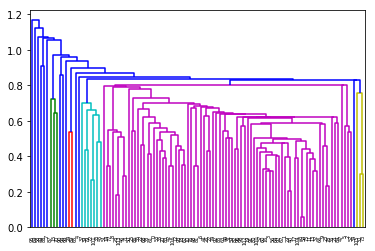

In [160]:
# Single linkage
mergings = linkage(df3, method ='single',metric = 'euclidean')
dendrogram(mergings)
plt.show()

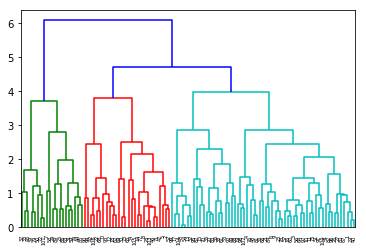

In [161]:
# Complete linkage 
mergings = linkage(df3, method ='complete',metric = 'euclidean')
dendrogram(mergings)
plt.show()

Complete linkage seems better option than single linkage, so we will go with complete linakage 

In [162]:
# 3 clusters 
cut_tree(mergings, n_clusters = 3)

array([[0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [2],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [2],
       [2],
       [1],
       [1],
       [0],
       [1],
       [0],
       [2],
       [1],
       [2],
       [0],
       [1],
       [1],
       [2],
       [1],
       [2],
       [1],
       [1],
       [0],
       [1],
       [2],
       [2],
       [0],
       [0],
       [1],
       [1],
       [2],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [2],
       [2],
       [1],
       [1],
       [0],
       [2],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [2],
       [0],
       [2],
       [1],
       [1],
       [0],
       [1],
       [2],
       [1],
       [1],
       [1],
    

In [163]:
# Checking the shape of cut tree data
cut_tree(mergings, n_clusters = 3).shape

(107, 1)

In [164]:
# Defining lebels 
cluster_labels = cut_tree(mergings, n_clusters = 3).reshape(-1,)
cluster_labels

array([0, 1, 0, 1, 1, 0, 1, 2, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 2, 2, 1, 1, 0, 1, 0, 2, 1, 2, 0, 1, 1, 2, 1, 2, 1, 1, 0, 1,
       2, 2, 0, 0, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 2, 1, 0,
       1, 1, 0, 0, 1, 0, 2, 0, 2, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 2, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 0, 0])

In [165]:
# assign cluster labels
dat_km['cluster_labels'] = cluster_labels
dat_km.head()

,country,PC1,PC2,PC3,PC4,ClusterID,cluster_labels
0,Afghanistan,-2.913787,0.088354,0.721003,0.996699,2,0
1,Albania,0.429358,-0.587859,0.321052,-1.171193,0,1
2,Algeria,-0.282988,-0.446657,-1.225135,-0.850127,0,0
3,Antigua and Barbuda,1.031988,0.130488,0.192922,-0.844808,1,1
4,Argentina,0.028470,-1.756721,-0.793520,-0.052486,0,1


In [166]:
# Let's check the shape of data
dat_km.shape

(107, 7)

In [167]:
# Check the count of observation per cluster
dat_km['cluster_labels'].value_counts()

1    59
0    28
2    20
Name: cluster_labels, dtype: int64

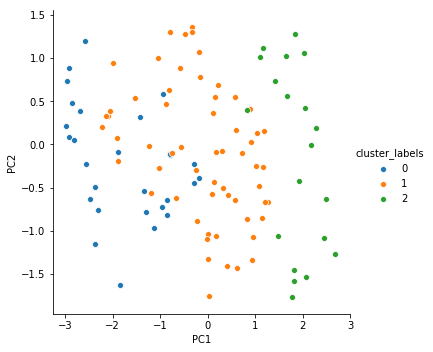

In [168]:
# Let's check the visualisation of PC1 and PC2
sns.pairplot(data=dat_km, x_vars=["PC1"], y_vars=["PC2"], hue = "cluster_labels", size=5)

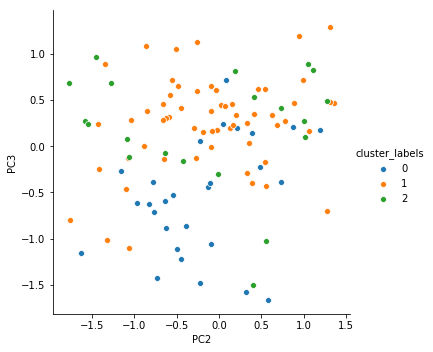

In [169]:
# Let's check the visualisation of PC2 and PC3
sns.pairplot(data=dat_km, x_vars=["PC2"], y_vars=["PC3"], hue = "cluster_labels", size=5)

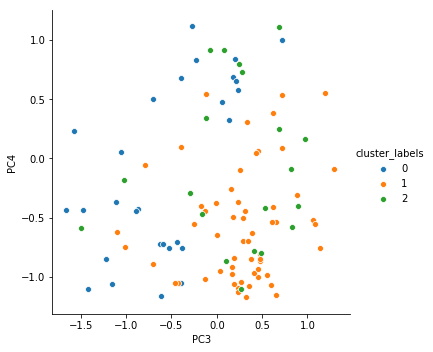

In [170]:
# Let's check the visualisation of PC3 and PC4
sns.pairplot(data=dat_km, x_vars=["PC3"], y_vars=["PC4"], hue = "cluster_labels", size=5)

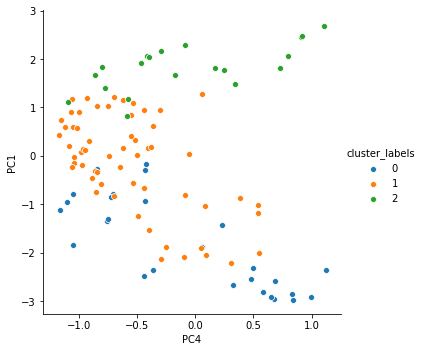

In [171]:
# Let's check the visualisation of PC4 and PC1
sns.pairplot(data=dat_km, x_vars=["PC4"], y_vars=["PC1"], hue = "cluster_labels", size=5)

## Cluster Profiling based on Hierarchical Clustering

In [172]:
# Let's merge the original data with the data(cluster_labels)
df_6 = pd.merge(df_1,dat_km,how = 'inner',on='country')
df_6.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,ClusterID,cluster_labels
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,-2.913787,0.088354,0.721003,0.996699,2,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0.429358,-0.587859,0.321052,-1.171193,0,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,-0.282988,-0.446657,-1.225135,-0.850127,0,0
3,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1.031988,0.130488,0.192922,-0.844808,1,1
4,Argentina,14.5,18.9,8.10,16.0,18700,20.90,75.8,2.37,10300,0.028470,-1.756721,-0.793520,-0.052486,0,1


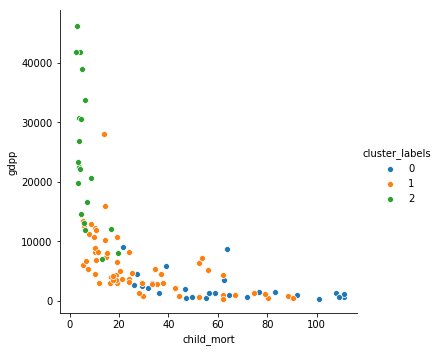

In [173]:
# Let's check the visualisation of original data variables based on 'cluster labels'
sns.pairplot(data=df_6, x_vars=["child_mort"], y_vars=["gdpp"], hue = "cluster_labels", size=5)

High child_mort rate countries are having low gdpp rate mostly which means cluster labels seperated perfectly 

In [174]:
# Let's drop PCs and ClusterID from the data
df_6.drop(['PC1','PC2','PC3','PC4','ClusterID'],axis = 1,inplace =True)

In [175]:
# Let's check data
df_6.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1
4,Argentina,14.5,18.9,8.10,16.0,18700,20.90,75.8,2.37,10300,1


## Analysis of the clusters

In [176]:
df_6.groupby(['cluster_labels']).child_mort.mean()

cluster_labels
0    64.042857
1    29.657627
2     6.480000
Name: child_mort, dtype: float64

In [177]:
# Let's profile the cluster by taking the mean of various attributes
child_mort = pd.DataFrame(df_6.groupby(['cluster_labels']).child_mort.mean())
exports = pd.DataFrame(df_6.groupby(['cluster_labels']).exports.mean())
health = pd.DataFrame(df_6.groupby(['cluster_labels']).health.mean())
imports = pd.DataFrame(df_6.groupby(['cluster_labels']).imports.mean())
income = pd.DataFrame(df_6.groupby(['cluster_labels']).income.mean())
inflation = pd.DataFrame(df_6.groupby(['cluster_labels']).inflation.mean())
life_expec = pd.DataFrame(df_6.groupby(['cluster_labels']).life_expec.mean())
total_fer = pd.DataFrame(df_6.groupby(['cluster_labels']).total_fer.mean())
gdpp = pd.DataFrame(df_6.groupby(['cluster_labels']).gdpp.mean())

In [178]:
# Let's add column name to it
df9 = pd.concat([pd.Series([0,1,2]),child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp], axis=1)

In [179]:
# Let's add column name to it
df9.columns = ["cluster_labels","child_mort","exports","health","imports","income","inflation","life_expec","total_fer","gdpp"]
df9

,cluster_labels,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,64.042857,27.142107,4.850714,30.363068,5389.214286,13.116964,64.464286,3.974643,2182.107143
1,1,29.657627,37.215254,6.616271,48.120339,10432.033898,5.680186,70.716949,2.707627,5783.440678
2,2,6.480000,54.550000,8.064000,51.695000,29110.000000,2.588150,78.445000,1.825000,24144.000000


Countries with cluster_labels '0' seems in dire need of money as they are having very Inflation rate,Low gddp,Low income,low Import and export,and very high child mort

Also it is seems better to go with hierarchical clustering because the clusters are wellformed than Kmeans clustering

In [182]:
# List of dire need of countries based on Hierarchical clustering
df10= df_6[df_6['cluster_labels']==0]['country']
df10

0        Afghanistan
2            Algeria
5         Azerbaijan
8         Bangladesh
12             Benin
14           Bolivia
18          Cameroon
22     Cote d'Ivoire
28             Egypt
30           Eritrea
34             Gabon
42            Guinea
46             India
47         Indonesia
52        Kazakhstan
62            Malawi
65          Mongolia
68        Mozambique
69           Myanmar
71             Nepal
73          Pakistan
77       Philippines
90             Sudan
93          Tanzania
94       Timor-Leste
103       Uzbekistan
105            Yemen
106           Zambia
Name: country, dtype: object

Above listed countries are in dire need of money and CEO need to focus on it 